# Librairies

In [260]:
import project_functions as pf
import numpy as np
import pandas as pd
import seaborn as sns
import yfinance as yf
%reload_ext autoreload
%autoreload 2
sns.set_theme()
sns.set(rc={"figure.figsize":(15, 6)},style="whitegrid")

# Portfolio

Importons les données :

In [261]:
# récupérons les données des prix sauvegardés dans le fichier prices.csv
datas = pd.read_csv('datas/prices.csv', sep=',')

# On récupère les tickers stockés dans le fichier tickers.txt
tickers = pf.get_tickers('datas/tickers.txt')

In [262]:
# Uniquement les prix liées aux tickers
prices = datas[["Date"]+tickers]

# On transforme la colonne Date en index
prices.set_index("Date", inplace=True)
prices.index = pd.to_datetime(prices.index)

prices.head()

,BESI.AS,ASML.AS,ASM.AS,MT.AS,REN.AS,AMG.AS,WKL.AS,SHELL.AS,RAND.AS,KPN.AS,AMUND.AS,AALB.AS,ARCAD.AS
Date,,,,,,,,,,,,,
2010-01-04,0.830604,27.659260,11.537248,53.427940,3.762785,8.194963,10.764404,10.527839,20.259628,3.689740,12.383609,8.183498,10.344408
2010-01-05,0.846276,27.710567,11.630810,52.923683,3.721653,8.169353,10.760955,10.598575,20.558300,3.702040,12.383609,8.148955,10.731913
2010-01-06,0.830604,28.007000,11.788899,52.523476,3.700648,8.080161,10.733355,10.522962,20.655998,3.705114,12.383609,8.310164,10.791023
2010-01-07,0.836873,27.493944,11.511437,53.491985,3.646388,8.124315,10.726455,10.491251,21.258936,3.637470,12.383609,8.267944,10.804158
2010-01-08,0.852545,26.570450,11.927629,53.868168,3.679208,8.106654,10.691954,10.430267,21.099819,3.642081,12.383609,8.283298,10.731913


Calculons les returns journaliers :

In [263]:
returns = pf.daily_asset_return(prices)

returns.head()

,BESI.AS,ASML.AS,ASM.AS,MT.AS,REN.AS,AMG.AS,WKL.AS,SHELL.AS,RAND.AS,KPN.AS,AMUND.AS,AALB.AS,ARCAD.AS
Date,,,,,,,,,,,,,
2010-01-05,0.018868,0.001855,0.008110,-0.009438,-0.010931,-0.003125,-0.000320,0.006719,0.014742,0.003334,0.0,-0.004221,0.037460
2010-01-06,-0.018518,0.010697,0.013592,-0.007562,-0.005644,-0.010918,-0.002565,-0.007134,0.004752,0.000830,0.0,0.019783,0.005508
2010-01-07,0.007547,-0.018319,-0.023536,0.018440,-0.014662,0.005465,-0.000643,-0.003013,0.029189,-0.018257,0.0,-0.005081,0.001217
2010-01-08,0.018726,-0.033589,0.036155,0.007033,0.009001,-0.002174,-0.003216,-0.005813,-0.007485,0.001268,0.0,0.001857,-0.006687
2010-01-11,-0.003676,-0.037546,-0.029213,-0.015156,-0.006898,0.020697,-0.008067,0.003275,0.004498,0.010131,0.0,0.014829,-0.022338


Nous devons définir une période d'entrainement et de test :
* la période d'entrainement est entre la première date disponible et le 1er Janvier 2015
* la période de test est entre la fin de l'entrainement et la dernière date disponible 

In [264]:
begin_train = returns.index[0]
end_train = "2017-01-01"
begin_test = end_train
end_test = returns.index[-1]

Il est nécessaire de séparer les données entre la phase d'entrainement et la phase de test.

In [265]:
returns_train, returns_test = pf.seperate_df(returns, begin_train, end_train, begin_test, end_test)

Nous pouvons déterminer les returns annualisés année grâce à la ligne de code suivante :

In [266]:
annu_returns_train = pf.annualy_asset_return(returns_train)

## Mean-Variance Portfolio

Let's compute the covariance matrix of the returns.

In [267]:
cov_matrix_train = returns_train.cov()

In [268]:
w1,r,v = pf.gmv_portfolio(returns_train,cov_matrix_train,show=True)

The portfolio return is: 15.53 %
The portfolio volatility is: 15.42 %


In [269]:
w,r,vol = pf.opt_mean_variance(returns_train,cov_matrix_train,obj_rend=0.1,risk_free=0.02624,show=True)

The portfolio return is: 10.0 %
The portfolio volatility is: 4.09 %


/Users/simonevanno/Desktop/centrale marseille/cours/3A/TEMPS2/Gestion Portefeuille/Portfolio-Project/project_functions.py:52: RuntimeWarning: invalid value encountered in double_scalars
  return (df+1).prod()**(business_days/df.shape[0])-1
/Users/simonevanno/Desktop/centrale marseille/cours/3A/TEMPS2/Gestion Portefeuille/Portfolio-Project/project_functions.py:52: RuntimeWarning: invalid value encountered in double_scalars
  return (df+1).prod()**(business_days/df.shape[0])-1
/Users/simonevanno/Desktop/centrale marseille/cours/3A/TEMPS2/Gestion Portefeuille/Portfolio-Project/project_functions.py:52: RuntimeWarning: invalid value encountered in double_scalars
  return (df+1).prod()**(business_days/df.shape[0])-1
/Users/simonevanno/Desktop/centrale marseille/cours/3A/TEMPS2/Gestion Portefeuille/Portfolio-Project/project_functions.py:52: RuntimeWarning: invalid value encountered in double_scalars
  return (df+1).prod()**(business_days/df.shape[0])-1
/Users/simonevanno/Desktop/centrale mars

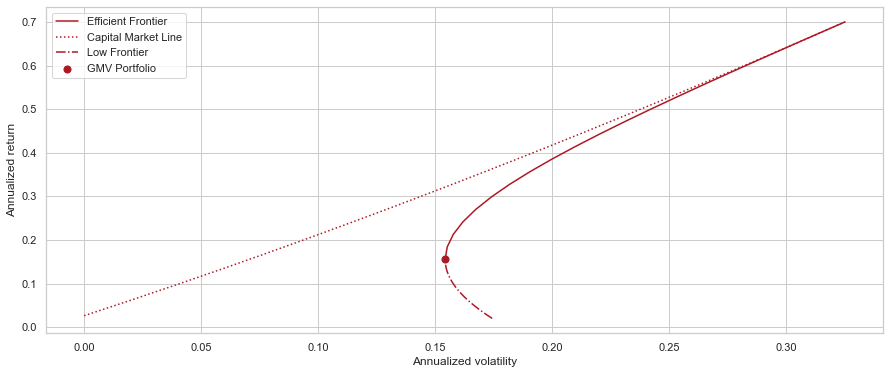

In [270]:
# plot the efficient frontier
eff, eff_rf = pf.efficient_frontier(returns_train,cov_matrix_train,min=0.02,max=0.7,number=20,risk_free=0.02624,plot=True)

Calculons le return du portfolio avec les poids souhaités sur la période de test :

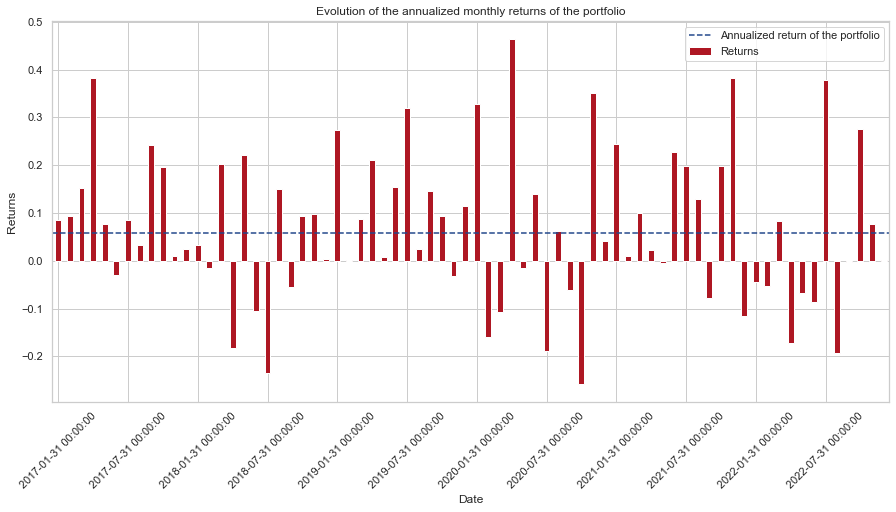

In [271]:
w_risk_free = w.copy()
pf.plot_returns(returns_test,w_risk_free,risk_free=0.02624)

Traçons la volatilité au cours de la période de test

/Users/simonevanno/Desktop/centrale marseille/cours/3A/TEMPS2/Gestion Portefeuille/Portfolio-Project/project_functions.py:273: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cov_list = [returns_list[i].cov() for i in range(len(returns_list))]


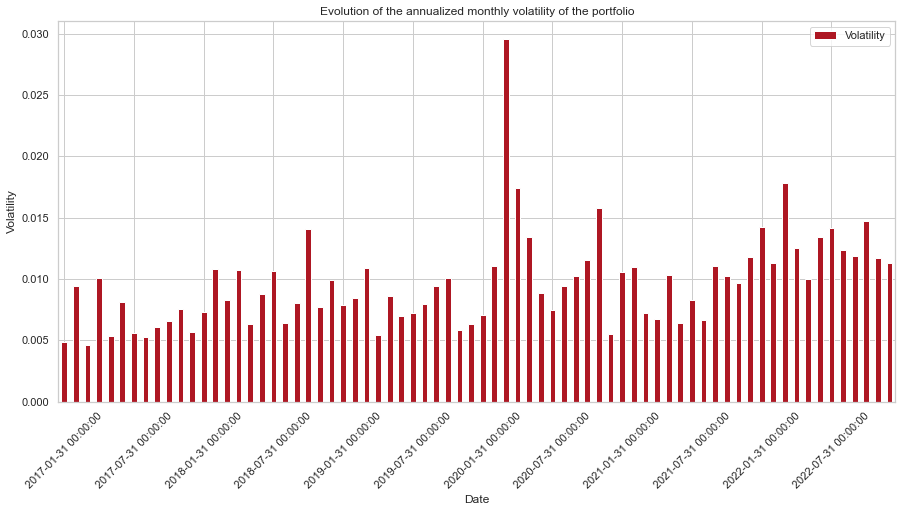

In [272]:
w_risk_free_vol = w.copy()
pf.plot_volatility(returns_test,w_risk_free_vol)

Calculons le rendement de notre portefeuille :

In [273]:
w_risk_free_return = w.copy()
pf.portfolio_return(w_risk_free_return,returns_test,show=True,risk_free=0.02624)

The portfolio return is: 5.78 %


0.05782689774736047

Calculons la volatilité de notre portefeuille :

In [274]:
w_risk_free_vol = w.copy()
del w_risk_free_vol['Risk Free']
w_risk_free_vol = pd.Series(w_risk_free_vol)
cov_matrix_test = returns_test.cov()
pf.portfolio_vol(w_risk_free_vol,cov_matrix_test,show=True)

The portfolio volatility is: 4.74 %


0.04739800688498151

Computation of the Sharpe ratio

In [275]:
sharpe = pf.sharpe_ratio(returns_test,w,risk_free=0.02624)
print(f"Le ratio de sharpe pour AEX vaut: {sharpe}")

Le ratio de sharpe pour AEX vaut: 2.8010915089180286


/Users/simonevanno/Desktop/centrale marseille/cours/3A/TEMPS2/Gestion Portefeuille/Portfolio-Project/project_functions.py:321: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  


Let's compare with the AEX index :

In [276]:
# On récupère les données de l'indice AEX
aex_data = pd.read_csv('datas/AEX-INDEX.csv', sep=',')

# On transforme la colonne time en index
aex_data.set_index("time", inplace=True)

# rename the index column
aex_data.index.name = 'Date'

# on supprime les colonnes inutiles
aex_data.drop(['volume'], axis=1, inplace=True)

# On change le format des dates
aex_data.index = pd.to_datetime(aex_data.index)

On calcul les returns

In [277]:
aex_returns = pf.daily_asset_return(aex_data)
aex_returns.head()

,AEX-INDEX
Date,
1999-01-05,0.013525
1999-01-06,0.030273
1999-01-07,-0.038687
1999-01-08,-0.003226
1999-01-11,-0.024139


Phases de test en d'entrainement

In [278]:
begin_train = returns.index[0]
end_train = "2017-01-01"
begin_test = end_train
end_test = returns.index[-1]

In [279]:
aex_train, aex_test = pf.seperate_df(aex_returns, begin_train, end_train, begin_test, end_test)

Calcul du return

In [280]:
w_aex = pd.Series({'AEX-INDEX':1, 'Risk Free':0})
pf.portfolio_return(w_aex,aex_test,show=True)

The portfolio return is: 6.5 %


0.06498472842044323

Calcul de la volatilité

In [281]:
cov_aex = aex_test.cov()
w_aex1 = w_aex.copy()
del w_aex1['Risk Free']
pf.portfolio_vol(w_aex1,cov_aex,show=True)

The portfolio volatility is: 17.62 %


0.17618834942390008

Calcul du ratio de sharpe pour l'AEX :

In [282]:
sharpe_aex = pf.sharpe_ratio(aex_test,w_aex,risk_free=0.02624)
print(f"Le ratio de sharpe pour AEX vaut: {sharpe_aex}")

Le ratio de sharpe pour AEX vaut: 0.8990127304675304


/Users/simonevanno/Desktop/centrale marseille/cours/3A/TEMPS2/Gestion Portefeuille/Portfolio-Project/project_functions.py:321: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  


Compute the returns of the portfolio :

In [283]:
returns_portfolio = pd.Series((returns*w).sum(axis=1),name="Portfolio")
returns_portfolio.to_csv('./datas/returns_portfolio.csv')

In [284]:
prices_portfolio = pd.Series((prices*w).sum(axis=1),name="Portfolio")
prices_portfolio.to_csv('./datas/prices_portfolio.csv')

## Additional Part - Analysis of Colleagues portfolio

In [285]:
portfolio_collegues = pd.read_csv('datas/portfolio-collegues.csv', sep=',')
portfolio_collegues = portfolio_collegues.set_index('Date')
portfolio_collegues.index = pd.to_datetime(portfolio_collegues.index)
portfolio_collegues.head()

,Portfolio
Date,
2012-12-14,-0.001870
2012-12-17,0.001211
2012-12-18,-0.000080
2012-12-19,0.012181
2012-12-20,0.004691


<AxesSubplot:xlabel='Date'>

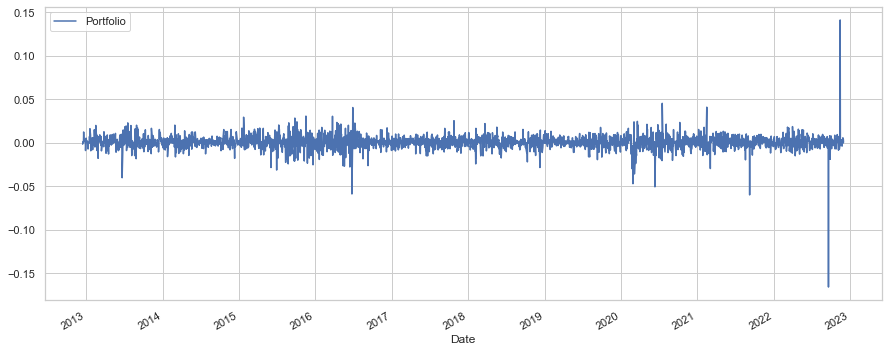

In [286]:
portfolio_collegues.plot()

In [287]:
portfolio_collegues.mean()

Portfolio    0.000355
dtype: float64

Ajouter ces rendements à notre portefeuille d'actions :

In [288]:
new_returns = pd.merge(returns, portfolio_collegues, left_index=True, right_index=True)

In [289]:
begin_train = returns.index[0]
end_train = "2017-01-01"
begin_test = end_train
end_test = returns.index[-1]

In [290]:
returns_train, returns_test = pf.seperate_df(new_returns, begin_train, end_train, begin_test, end_test)

In [291]:
cov_matrix_train = returns_train.cov()

In [292]:
w1,r,v = pf.gmv_portfolio(returns_train,cov_matrix_train,show=True)

The portfolio return is: 15.34 %
The portfolio volatility is: 11.67 %


In [293]:
w,r,vol = pf.opt_mean_variance(returns_train,cov_matrix_train,obj_rend=0.1,risk_free=0.02624,show=True)

The portfolio return is: 10.0 %
The portfolio volatility is: 3.73 %


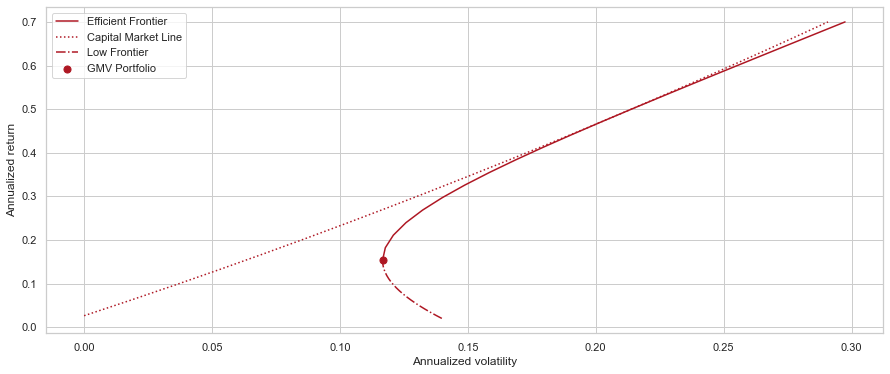

In [294]:
eff, eff_rf = pf.efficient_frontier(returns_train,cov_matrix_train,min=0.02,max=0.7,number=20,risk_free=0.02624,plot=True)

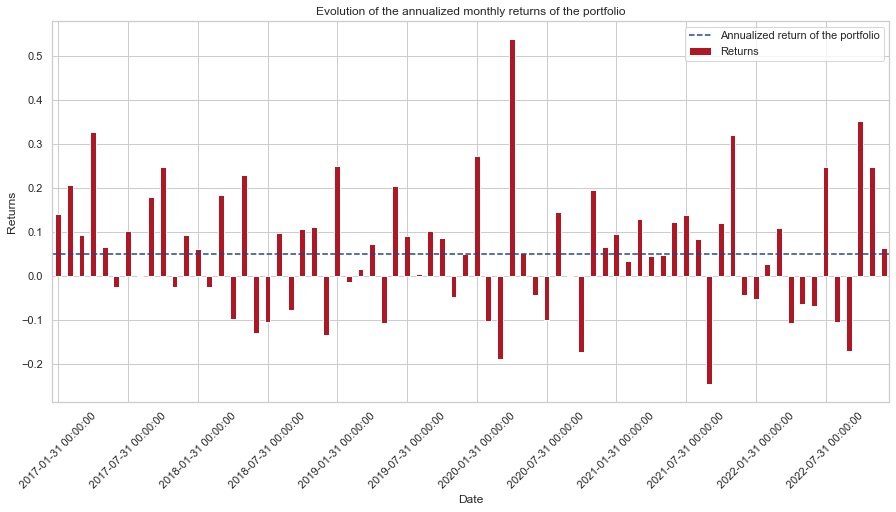

In [295]:
w_risk_free = w.copy()
pf.plot_returns(returns_test,w_risk_free,risk_free=0.02624)

/Users/simonevanno/Desktop/centrale marseille/cours/3A/TEMPS2/Gestion Portefeuille/Portfolio-Project/project_functions.py:273: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cov_list = [returns_list[i].cov() for i in range(len(returns_list))]
/Users/simonevanno/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:10471: RuntimeWarning: Degrees of freedom <= 0 for slice
  base_cov = np.cov(mat.T, ddof=ddof)
/Users/simonevanno/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2680: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/Users/simonevanno/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2680: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


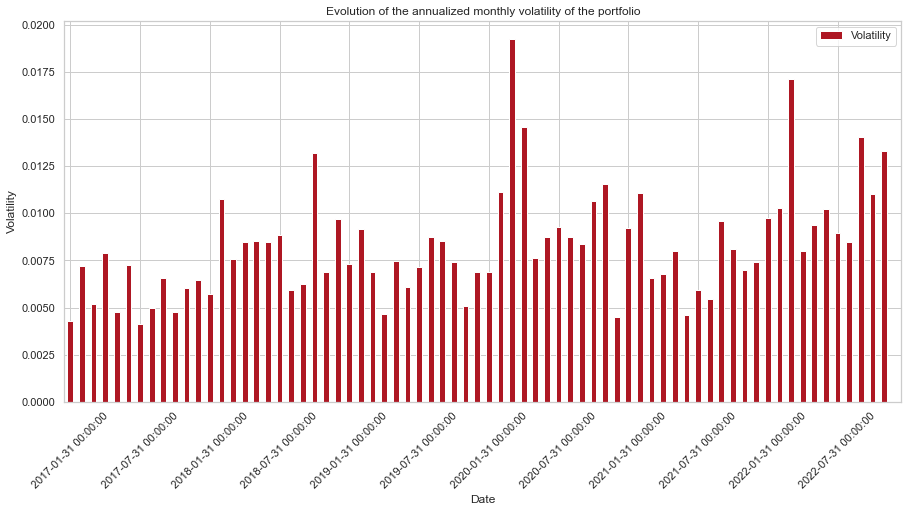

In [296]:
w_risk_free_vol = w.copy()
pf.plot_volatility(returns_test,w_risk_free_vol)

In [297]:
w_risk_free_return = w.copy()
pf.portfolio_return(w_risk_free_return,returns_test,show=True,risk_free=0.02624)

The portfolio return is: 5.05 %


0.05047480521071879

In [298]:
w_risk_free_vol = w.copy()
del w_risk_free_vol['Risk Free']
w_risk_free_vol = pd.Series(w_risk_free_vol)
cov_matrix_test = returns_test.cov()
pf.portfolio_vol(w_risk_free_vol,cov_matrix_test,show=True)

The portfolio volatility is: 4.01 %


0.04011351008596516

In [299]:
w

{'BESI.AS': 0.061,
 'ASML.AS': 0.003,
 'ASM.AS': -0.021,
 'MT.AS': -0.017,
 'REN.AS': 0.065,
 'AMG.AS': 0.03,
 'WKL.AS': 0.046,
 'SHELL.AS': -0.037,
 'RAND.AS': -0.001,
 'KPN.AS': -0.019,
 'AMUND.AS': 0.002,
 'AALB.AS': 0.016,
 'ARCAD.AS': -0.034,
 'Portfolio': 0.086,
 'Risk Free': 0.82}